# Topic Analysis
- Cluster speech data into distinct topics
- Calculate topic frequencies over time
- Generate word clouds to visualize topics

## Imports

In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors
from sklearn.manifold import TSNE
import matplotlib.patheffects as PathEffects

## Plot Settings

In [4]:
# lineweight
plt.rc('lines', linewidth=3)
# figure size
plt.rc('figure', figsize=(12, 7))
# title fontsize
plt.rc('axes', titlesize=33) 
# axes label fontsize
plt.rc('axes', labelsize=28)
# axes values fontsize
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
# legend fontsize
plt.rc('legend', fontsize=20)
plt.rcParams['legend.title_fontsize'] = 22

## Data

In [5]:
transcripts = pd.read_csv('data/cln_transcripts.csv', index_col=0)
# convert Date column to datetime format
transcripts['Date'] = pd.to_datetime(transcripts['Date'])
transcripts.head()

,Title,Date,President,Type,Transcript
0,"April 30, 1789: First Inaugural Address",1789-04-30,George Washington,inauguration,Fellow Citizens of the Senate and the House of...
1,"October 3, 1789: Thanksgiving Proclamation",1789-10-03,George Washington,other,Whereas it is the duty of all Nations to ackno...
2,"January 8, 1790: First Annual Message to Congress",1790-01-08,George Washington,state_union,Fellow Citizens of the Senate and House of Rep...
3,"December 8, 1790: Second Annual Message to Con...",1790-12-08,George Washington,state_union,Fellow citizens of the Senate and House of Rep...
4,"December 29, 1790: Talk to the Chiefs and Coun...",1790-12-29,George Washington,other,"I the President of the United States, by my ow..."


# Vectorize Document Text
Create sparse matrix of word counts for each document (presidential address)

In [6]:
# text data
documents = transcripts['Transcript']

In [7]:
# number of documents
num_docs = len(documents)

## TFIDF

In [8]:
# create instance of TFIDF vectorizer
# tf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=0.05, ngram_range=(1, 3))
# # transform documents into document-term matrix
# X = tf_vectorizer.fit_transform(documents)
# # save vectorizer
# with open('model_output/tfidf.pkl', 'wb') as outfile:
#     pickle.dump(tf_vectorizer, outfile)
# # save array
# with open('model_output/v_array.pkl', 'wb') as outfile:
#     pickle.dump(X, outfile)

In [9]:
# load vectorizer
with open('model_output/tfidf.pkl', 'rb') as infile:
    tf_vectorizer = pickle.load(infile)
# load vectorized array
with open('model_output/v_array.pkl', 'rb') as infile:
    X = pickle.load(infile)

In [10]:
# create dataframe of document-term matrix
tf_df = pd.DataFrame(X.toarray(), columns=[tf_vectorizer.get_feature_names()])
tf_df.head()

,000,000 000,000 men,000 people,000 year,10,10 000,10 years,100,100 000,...,yes,yesterday,yield,yielding,york,young,young men,young people,youth,zeal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.050819
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.02925,0.023455,0.036168,0.0,0.0,0.000000


# Topic Modeling
Generate topics using clustering...

### Print Top Words Function
Print the top words for each topic

In [11]:
# function to print top words of topic model
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}: ".format(index)
        message += "; ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*70)

## NMF

In [12]:
# # create instance of model, input number of topics to output
# nmf = NMF(n_components=20, random_state=0)
# # run model
# nmf.fit(tf_df)
# # save model
# with open('model_output/nmf.pkl', 'wb') as outfile:
#     pickle.dump(nmf, outfile)

In [13]:
# load model
with open('model_output/nmf.pkl', 'rb') as infile:
    nmf = pickle.load(infile)

In [14]:
# create array of topic weights per document
topic_array = nmf.transform(tf_df)

In [15]:
# display top words for each topic
print_top_words(nmf, tf_vectorizer.get_feature_names(), 25)


Topic #0: public; commerce; states; congress; british; great; vessels; citizens; war; country; subject; session; treasury; present; tribes; united states; united; necessary; objects; measures; debt; effect; revenue; peace; militia

Topic #1: america; americans; tonight; jobs; new; health; work; health care; children; care; people; american; help; year; child; families; let; businesses; workers; make; economy; insurance; need; college; years

Topic #2: states; united states; united; persons; president united states; president united; proclamation; president; said; united states america; states america; laws; day; independence united states; independence united; whereof; seal; state; city washington; laws united; laws united states; secretary state; thereof; city; america

Topic #3: ve; going; don; people; want; know; got; ll; just; thank; lot; think; like; say; ve got; said; didn; tell; thing; right; everybody; folks; country; years; way

Topic #4: president; mr; mr president; think; c

In [16]:
# topic label dictionary
topic_dict = {
    0: 'National Issues - Sovereignty',
    1: 'National Issues - People',
    2: 'Government - Nation',
    3: 'General Words - General Words',
    4: 'Government - Officials',
    5: 'Government - Organization',
    6: 'Economy - Policy 1',
    7: 'War - Cold War',
    8: 'War - Vietnam War',
    9: 'War - Terror',
    10: 'Government - Departments',
    11: 'Economy - Currency',
    12: 'Economy - Commerce',
    13: 'International - Latin America',
    14: 'War - World War II',
    15: 'International - Global',
    16: 'Ideals - Exemplar',
    17: 'Government - Law',
    18: 'Ideals - Values',
    19: 'Economy - Policy 2'
}

In [17]:
# create topic dataframe
topic_df = pd.DataFrame(topic_array, columns=topic_dict.values())
# convert topic weights to percentile per document
topic_df = round(topic_df.div(topic_df.sum(axis=1), axis=0)*100, 0)
topic_df.head()

,National Issues - Sovereignty,National Issues - People,Government - Nation,General Words - General Words,Government - Officials,Government - Organization,Economy - Policy 1,War - Cold War,War - Vietnam War,War - Terror,Government - Departments,Economy - Currency,Economy - Commerce,International - Latin America,War - World War II,International - Global,Ideals - Exemplar,Government - Law,Ideals - Values,Economy - Policy 2
0,19.0,0.0,2.0,0.0,3.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
1,5.0,0.0,9.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,6.0,0.0
2,45.0,2.0,5.0,0.0,0.0,39.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,6.0,0.0,0.0
3,76.0,0.0,0.0,0.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
4,13.0,0.0,45.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,18.0,0.0,10.0,0.0,0.0,6.0,0.0


In [18]:
# general topic category dictionary
category_dict = {
    0: 'National Issues',
    1: 'National Issues',
    2: 'Government',
    3: 'General Words',
    4: 'Government',
    5: 'Government',
    6: 'Economy',
    7: 'War',
    8: 'War',
    9: 'War',
    10: 'Government',
    11: 'Economy',
    12: 'Economy',
    13: 'International',
    14: 'War',
    15: 'International',
    16: 'Ideals',
    17: 'Government',
    18: 'Ideals',
    19: 'Economy'
}

In [19]:
# create category dataframe
cat_df = topic_df.copy()
# use categories for column labels
cat_df.columns = category_dict.values()
# sum rows by column name
cat_df = cat_df.groupby(cat_df.columns, axis=1).sum()
cat_df.head()

,Economy,General Words,Government,Ideals,International,National Issues,War
0,0.0,0.0,73.0,7.0,0.0,19.0,0.0
1,0.0,0.0,83.0,6.0,5.0,5.0,0.0
2,0.0,0.0,50.0,0.0,3.0,47.0,1.0
3,10.0,0.0,12.0,0.0,0.0,76.0,1.0
4,1.0,4.0,50.0,6.0,28.0,13.0,0.0


# Topic Vizualization

In [20]:
# dictionary to map each category to a color
cat_colors = {
    'Government': 'darkblue', 
    'Economy': 'darkgreen', 
    'War': 'darkred',
    'Ideals': 'darkorange',
    'International': 'purple', 
    'National Issues': 'teal',
    'General Words': 'grey'  
}

## TSNE Plot
Plot documents by primary topic

In [21]:
def scatter(x, points, colors):

    # create scatter plot
    f = plt.figure(figsize=(20, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:, 0], x[:, 1], lw=0, s=40, color=colors)
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # label clusters
    txts = []
    for i in range(len(np.unique(points))):
        # position labels
        xtext, ytext = np.median(x[points == i, :], axis=0)
        # label by specific topic
        txt = ax.text(xtext, ytext, topic_dict[i].split(' - ')[1], fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="white"),
            PathEffects.Normal()])
        txts.append(txt)

    # color legend
    patch_list = []
    for patch in cat_colors.keys():
        patch_list.append(mpatches.Patch(color=cat_colors[patch], label=patch))
    ax.legend(handles=patch_list, title='Topic Categories', loc="upper left")
    
    return(f, ax, sc, txts)

In [22]:
# # create tsne object based on topic array
# tsne = TSNE(metric="cosine", random_state=0).fit_transform(topic_array)
# # save model
# with open('model_output/tsne.pkl', 'wb') as outfile:
#     pickle.dump(tsne, outfile)

In [23]:
# load model
with open('model_output/tsne.pkl', 'rb') as infile:
    tsne = pickle.load(infile)

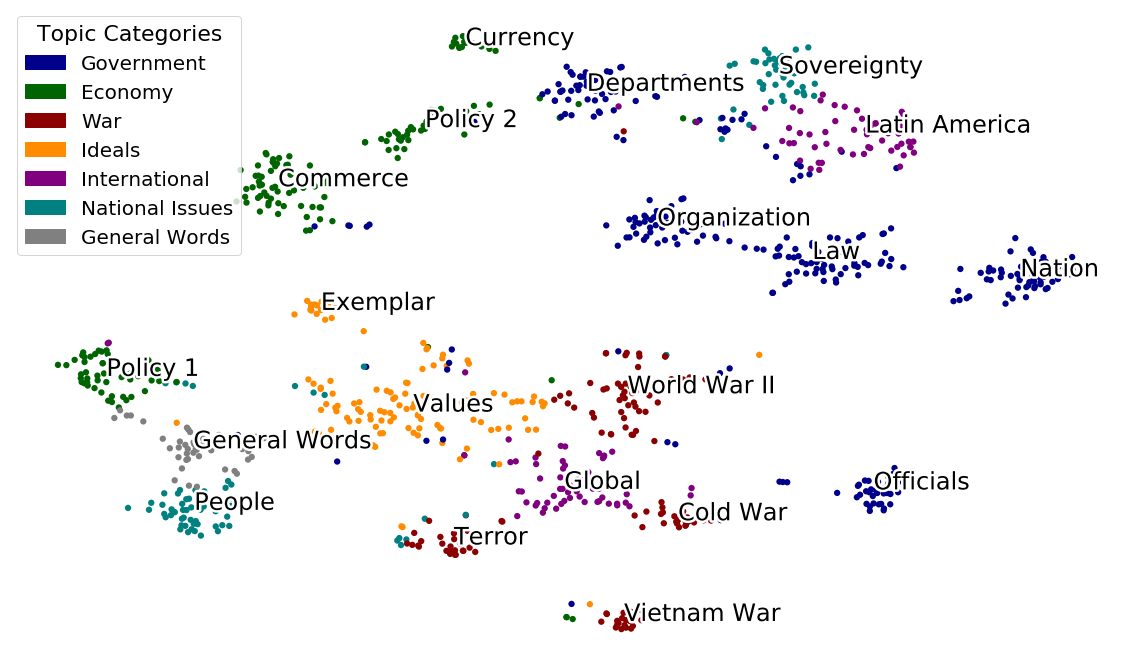

In [24]:
# array of top topic # per document
top_topics = np.argmax(topic_array, axis=1)
# assign colors to topic array
color_array = np.vectorize(cat_colors.__getitem__)(np.vectorize(category_dict.__getitem__)(top_topics))
# call plot function
scatter(tsne, top_topics, color_array);
# save plot image
# plt.savefig('model_output/tsne.png', bbox_inches='tight')

## Plot Topic Frequency

In [25]:
# plot format style
plt.style.use('fivethirtyeight')

### Topic Frequency

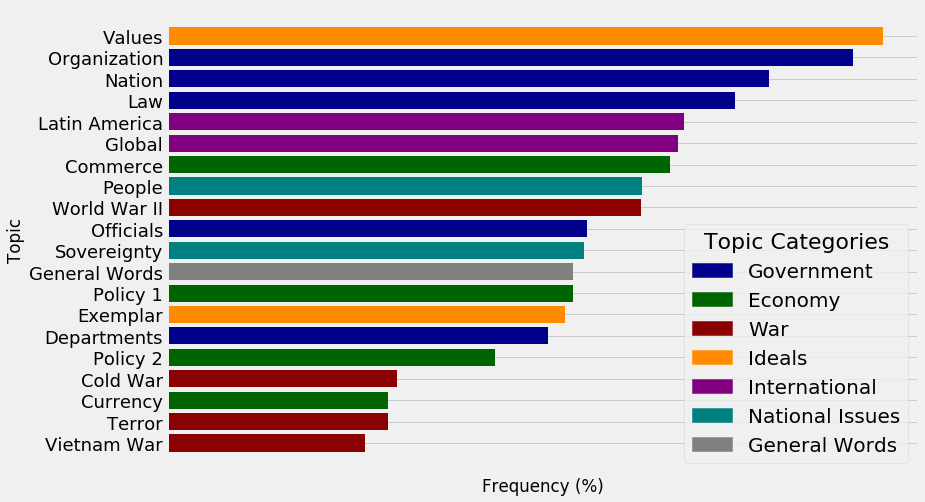

In [26]:
# categories for sorted topic dataframe
top_cats = [label.split(' - ')[0] for label in topic_df.mean().sort_values().index]
# topics for sorted topic dataframe
tops = [label.split(' - ')[1] for label in topic_df.mean().sort_values().index]

# bar plot of topic frequencies
x = tops
y = topic_df.mean().sort_values()
# list of topic color based on its category
colors = [cat_colors[cat] for cat in top_cats]

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y, color=colors)
ax.set_yticks(range(len(x)))
ax.set_yticklabels(x)
ax.set_ylabel('Topic')
ax.set_xlabel('Frequency (%)')
ax.set_xticks([])
# color legend
patch_list = []
for patch in cat_colors.keys():
    patch_list.append(mpatches.Patch(color=cat_colors[patch], label=patch))
plt.legend(handles=patch_list, title='Topic Categories');
# save plot image
# plt.savefig('model_output/top_freq.png', bbox_inches='tight')

### Category Frequency

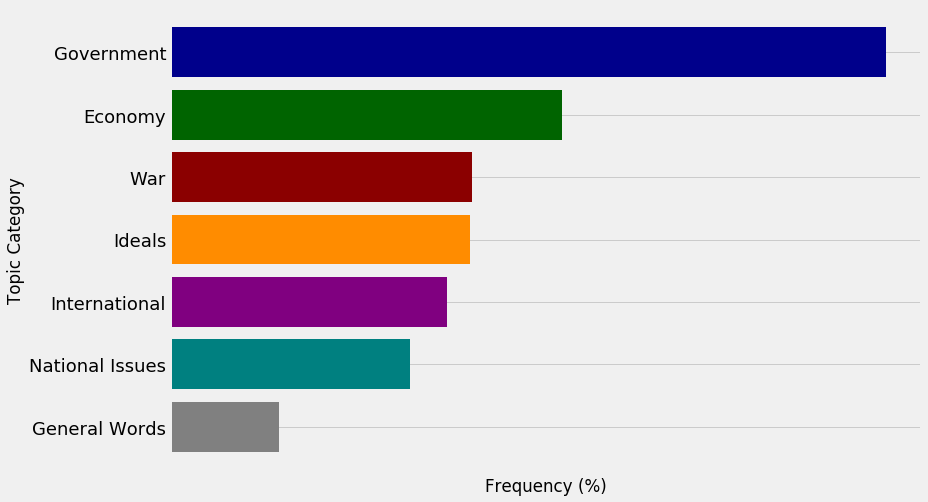

In [27]:
x = cat_df.mean().sort_values().index
y = cat_df.mean().sort_values()
colors = [cat_colors[cat] for cat in cat_df.mean().sort_values().index]

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(x, y, color=colors)
ax.set_yticks(range(len(x)))
ax.set_yticklabels(x)
ax.set_ylabel('Topic Category')
ax.set_xlabel('Frequency (%)')
ax.set_xticks([]);
# save plot image
# plt.savefig('model_output/cat_freq.png', bbox_inches='tight');

# Address Composition During War

In [28]:
# add Date column to topic dataframes
cat_df['Date'] = transcripts.iloc[:, 1]
topic_df['Date'] = transcripts.iloc[:, 1]

### Topic Sort Function
Filter addresses by speaker and date range and return multi-dimensional dataframe of sorted topics

In [29]:
def sort_top(address_df, topic_df, top_num, pres, start_date, end_date):
    
    # index of filtered addresses
    idx = address_df[
        (address_df['President'] == pres) & 
        (address_df['Date'] >= start_date) & 
        (address_df['Date'] <= end_date)
    ].index
    
    # average topic percentages for each year
    yr_tops = topic_df.iloc[idx, :].groupby(topic_df.iloc[idx, :]['Date'].dt.year).mean()
    # sort topic label array by rows (ascending order)
    lab_sort = np.argsort(yr_tops.values)
    # arrange label array in descending order
    lab_sort = lab_sort[:, ::-1]
    # sort topic percentage array by rows (ascending order)
    pct_sort = yr_tops.values.copy()
    pct_sort.sort(axis=1)
    # arrange percentage array in descending order
    pct_sort = pct_sort[:, ::-1]

    # interweave sorted label and percentage arrays for dataframe
    num_yrs = yr_tops.shape[0]
    num_tops = yr_tops.shape[1]
    top_sort = np.empty((num_yrs, num_tops*2))
    top_sort[:, 0::2] = lab_sort
    top_sort[:, 1::2] = pct_sort
    
    # create primary column labels for dataframe
    top_order = []
    for place in range(0, num_tops):
        top_order.append('Topic ' + str(place+1))
    
    # function to map topic labels to topic percentages
    def top_map(x):
        return(topic_dict[x])
    
    # create final topic dataframe
    top_sort_df = pd.DataFrame(top_sort)
    # map topic labels
    top_sort_df.iloc[:, ::2] = top_sort_df.iloc[:, ::2].applymap(top_map)
    # create index for multi-dimensional dataframe
    m_idx = pd.MultiIndex.from_product([top_order, ['Topic', '%']])
    # create multidimensional dataframe
    top_sort_df = pd.DataFrame(top_sort_df.values, index=yr_tops.index, columns=m_idx)
    # retain only highest topics
    top_sort_df = top_sort_df[top_order[:top_num]]
    
    return(top_sort_df)

### Composite Topic Bar Plot Function
Filter addresses by speaker and date range and return bar plot of composite topic categories by year 

In [30]:
def add_comp(address_df, cat_df, pres, start_date, end_date):
    
    # index of filtered addresses
    idx = address_df[
        (address_df['President'] == pres) & 
        (address_df['Date'] >= start_date) & 
        (address_df['Date'] <= end_date)
    ].index
    
    # average category percentages for each year
    yr_cats = cat_df.iloc[idx, :].groupby(cat_df.iloc[idx, :]['Date'].dt.year).mean()
    # reverse column order
    yr_cats = yr_cats.iloc[:, ::-1]
    
    # bar plot
    color_list = [cat_colors[cat] for cat in yr_cats.columns]
    ax = yr_cats.plot(kind='bar', stacked=True, color=color_list, rot=0)
    ax.set_xlabel('Year')
    ax.set_ylabel('Frequency (%)')
    ax.set_yticks([])
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

## Civil War

### Lincoln Addresses

In [31]:
start_date = '1861-04-12'
end_date = '1865-04-09'
pres = 'Abraham Lincoln'

In [32]:
sort_top(transcripts, topic_df, 5, pres, start_date, end_date)

Topic 1                         Topic 2        \
                              Topic     %                     Topic     %   
Date                                                                        
1861      Government - Organization  26.5          Government - Law  23.5   
1862             Economy - Policy 2    18  Government - Departments    16   
1863                Ideals - Values    21       Government - Nation    21   
1864  International - Latin America    23  Government - Departments    18   
1865             War - World War II    36           Ideals - Values    27   

                       Topic 3                               Topic 4        \
                         Topic      %                          Topic     %   
Date                                                                         
1861  Government - Departments   15.5             Economy - Policy 2   8.5   
1862          Government - Law     11  International - Latin America    10   
1863        War - World War II  18.75               Government - Law  11.5   
1864          Government - Law     14      Government - Organization     9   
1865          Government - Law     12              Ideals - Exemplar     7   

                            Topic 5       
                              Topic    %  
Date                                      
1861             War - World War II  6.5  
1862             Economy - Currency    9  
1863       Government - Departments    9  
1864             War - World War II  6.5  
1865  National Issues - Sovereignty    6

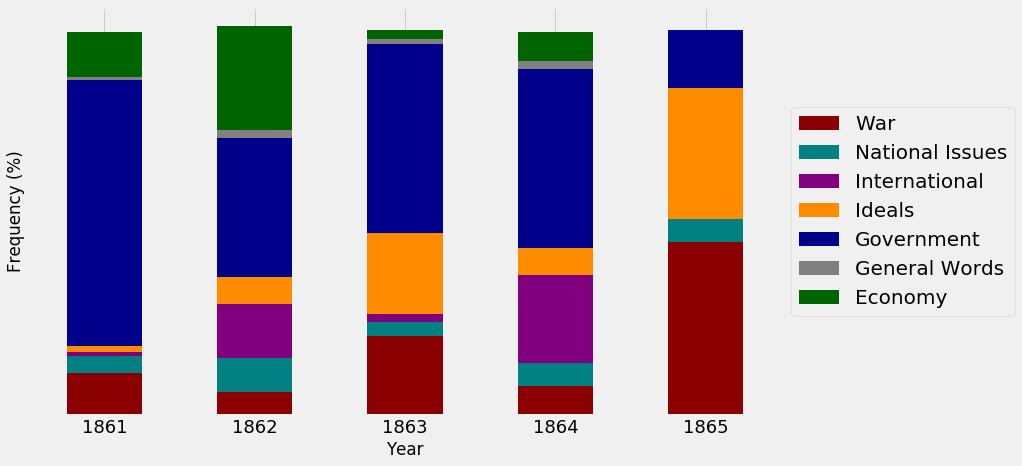

In [33]:
ax = add_comp(transcripts, cat_df, pres, start_date, end_date)
# save plot image
# plt.savefig('model_output/cw_linc.png', bbox_inches='tight');

## WW2

### FDR Addresses

In [34]:
start_date = '1939-09-01'
end_date = '1945-09-02'
pres = 'Franklin D. Roosevelt'

In [35]:
sort_top(transcripts, topic_df, 5, pres, start_date, end_date)

Topic 1                          Topic 2           \
                       Topic        %                   Topic        %   
Date                                                                     
1939      War - World War II       28       Ideals - Exemplar       17   
1940      War - World War II    28.25         Ideals - Values     13.5   
1941      War - World War II    39.25         Ideals - Values   13.125   
1942      War - World War II    64.25      Economy - Commerce     8.75   
1943      War - World War II  58.3333  International - Global  13.6667   
1944      War - World War II     51.5  International - Global    10.75   
1945  International - Global       28      War - World War II       27   

                     Topic 3                             Topic 4           \
                       Topic        %                      Topic        %   
Date                                                                        
1939  International - Global       17        Government - Nation       11   
1940  International - Global    11.75  Government - Organization    11.25   
1941  International - Global    9.875          Ideals - Exemplar    9.375   
1942      Economy - Policy 1      6.5     International - Global      4.5   
1943         Ideals - Values      4.5   National Issues - People  4.16667   
1944       Ideals - Exemplar        7         Economy - Commerce        6   
1945         Ideals - Values  15.6667  Government - Organization  7.33333   

                        Topic 5           
                          Topic        %  
Date                                      
1939  Government - Organization        7  
1940          Ideals - Exemplar     7.25  
1941        Government - Nation        9  
1942            Ideals - Values      4.5  
1943         Economy - Policy 2  3.33333  
1944            Ideals - Values        5  
1945     Government - Officials        5

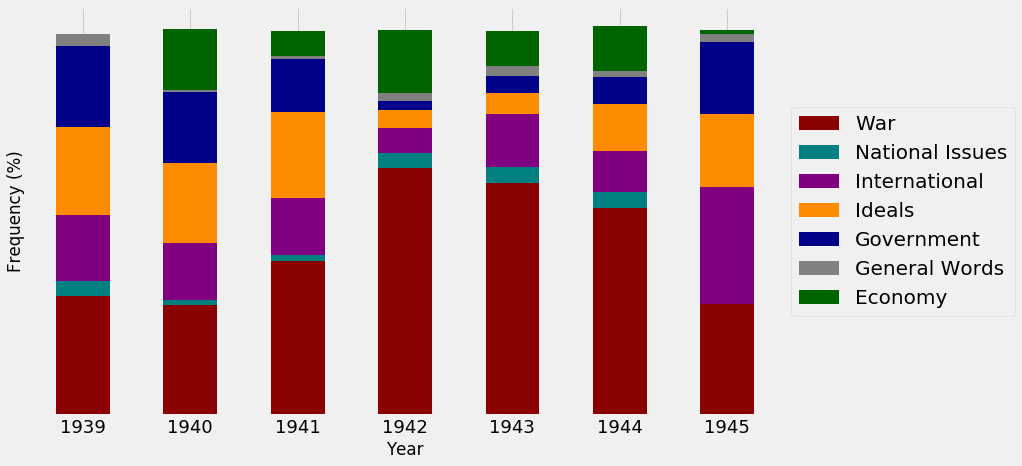

In [36]:
add_comp(transcripts, cat_df, pres, start_date, end_date)
# save plot image
# plt.savefig('model_output/ww2_fdr.png', bbox_inches='tight');

## Vietnam

In [37]:
start_date = '1964-08-02'
end_date = '1975-04-30'
pres = 'Lyndon B. Johnson'

In [38]:
sort_top(transcripts, topic_df, 5, pres, start_date, end_date)

Topic 1                          Topic 2           \
                       Topic        %                   Topic        %   
Date                                                                     
1964  International - Global     14.8         Ideals - Values     14.2   
1965  Government - Officials  28.4762         Ideals - Values  22.4762   
1966       War - Vietnam War  35.5833  Government - Officials  21.5833   
1967  Government - Officials     33.4       War - Vietnam War     28.8   
1968       War - Vietnam War  36.2857         Ideals - Values  10.2857   
1969      Economy - Policy 1       20       War - Vietnam War       18   

                     Topic 3                                 Topic 4           \
                       Topic        %                          Topic        %   
Date                                                                            
1964       War - Vietnam War     10.4                 War - Cold War       10   
1965  International - Global  9.52381             War - World War II  4.57143   
1966  International - Global       12                Ideals - Values  9.83333   
1967      Economy - Policy 1        5  General Words - General Words      4.9   
1968      Economy - Policy 1        9  International - Latin America  6.71429   
1969  Government - Officials       14                Ideals - Values       10   

                       Topic 5           
                         Topic        %  
Date                                     
1964       Government - Nation      9.6  
1965         War - Vietnam War  4.19048  
1966        Economy - Policy 1  4.91667  
1967           Ideals - Values      4.4  
1968    Government - Officials  6.14286  
1969  National Issues - People      9.5

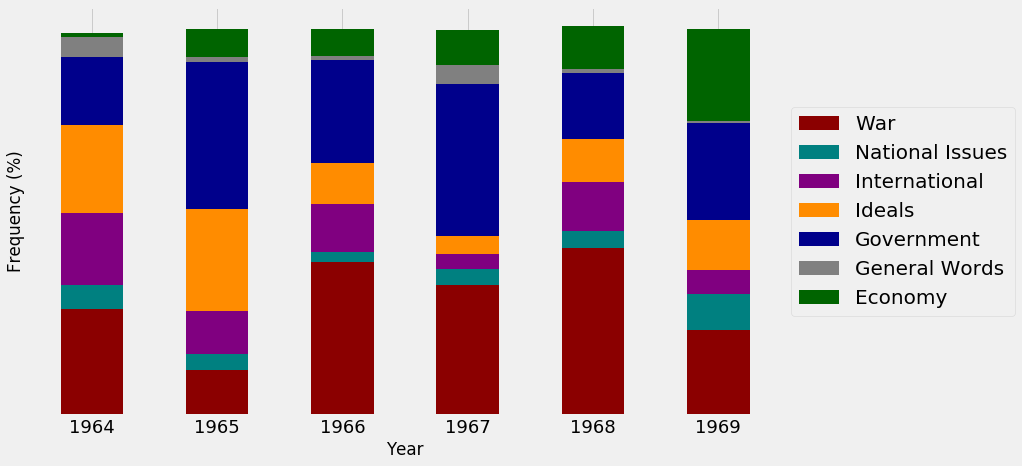

In [39]:
add_comp(transcripts, cat_df, pres, start_date, end_date)
# save plot image
# plt.savefig('model_output/viet_lbj.png', bbox_inches='tight');

### Nixon Addresses

In [40]:
pres = 'Richard M. Nixon'

In [41]:
sort_top(transcripts, topic_df, 5, pres, start_date, end_date)

Topic 1                      Topic 2           \
                       Topic        %               Topic        %   
Date                                                                 
1968       Ideals - Exemplar       26     Ideals - Values       23   
1969       War - Vietnam War       36     Ideals - Values     26.5   
1970       War - Vietnam War     42.5  Economy - Policy 1     14.5   
1971       War - Vietnam War    24.75      War - Cold War     24.5   
1972       War - Vietnam War  34.1667   Ideals - Exemplar  11.1667   
1973       War - Vietnam War       23   Ideals - Exemplar    14.75   
1974  Government - Officials     28.5     Ideals - Values  16.1667   

                       Topic 3                          Topic 4           \
                         Topic        %                   Topic        %   
Date                                                                       
1968  National Issues - People       21     Government - Nation       15   
1969         Ideals - Exemplar       11  International - Global       11   
1970         Ideals - Exemplar      7.5  International - Global        7   
1971        Economy - Policy 1      8.5  International - Global     8.25   
1972  National Issues - People  9.66667  International - Global        9   
1973           Ideals - Values    14.75  International - Global       11   
1974  National Issues - People      8.5  International - Global  8.33333   

                            Topic 5           
                              Topic        %  
Date                                          
1968              War - Vietnam War       10  
1969             War - World War II        4  
1970       National Issues - People      6.5  
1971       National Issues - People      6.5  
1972                Ideals - Values  7.16667  
1973         Government - Officials     9.75  
1974  General Words - General Words      7.5

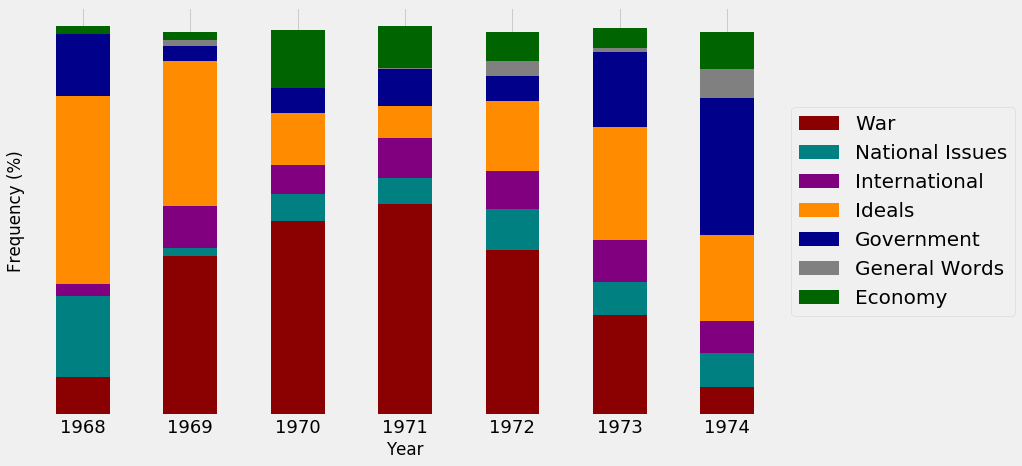

In [42]:
add_comp(transcripts, cat_df, pres, start_date, end_date)
# save plot image
# plt.savefig('model_output/viet_nix.png', bbox_inches='tight');

## Terror

### W Bush Addresses

In [43]:
start_date = '2001-09-11'
end_date = '2011-09-11'
pres = 'George W. Bush'

In [44]:
sort_top(transcripts, topic_df, 5, pres, start_date, end_date)

Topic 1                                 Topic 2  \
                         Topic        %                          Topic   
Date                                                                     
2001              War - Terror     27.5                Ideals - Values   
2002  National Issues - People  28.3333                   War - Terror   
2003              War - Terror     37.4       National Issues - People   
2004  National Issues - People       34                   War - Terror   
2005              War - Terror     28.2       National Issues - People   
2006  National Issues - People       24                Ideals - Values   
2007              War - Terror       46  General Words - General Words   
2008              War - Terror     27.4       National Issues - People   
2009              War - Terror       23  General Words - General Words   

                                Topic 3           \
            %                     Topic        %   
Date                                               
2001     20.5  National Issues - People       18   
2002  25.8333    International - Global  8.66667   
2003     21.4    International - Global     10.4   
2004       25           Ideals - Values     8.75   
2005     17.8           Ideals - Values     14.4   
2006     21.5        Economy - Policy 1     17.5   
2007  17.3333  National Issues - People  15.6667   
2008     19.8        Economy - Policy 1       14   
2009     21.5    Government - Officials       19   

                            Topic 4                             Topic 5  \
                              Topic        %                      Topic   
Date                                                                      
2001              Ideals - Exemplar     15.5         War - World War II   
2002  General Words - General Words  8.16667            Ideals - Values   
2003             War - World War II        6            Ideals - Values   
2004         International - Global        5         Economy - Commerce   
2005  General Words - General Words      7.6         Economy - Policy 1   
2006                   War - Terror     11.5          Ideals - Exemplar   
2007             Economy - Policy 1  4.66667  Government - Organization   
2008             Economy - Commerce      9.6         Economy - Currency   
2009                Ideals - Values       17   National Issues - People   

               
            %  
Date           
2001      5.5  
2002  6.33333  
2003        6  
2004        5  
2005        6  
2006      8.5  
2007  4.33333  
2008      8.2  
2009      8.5

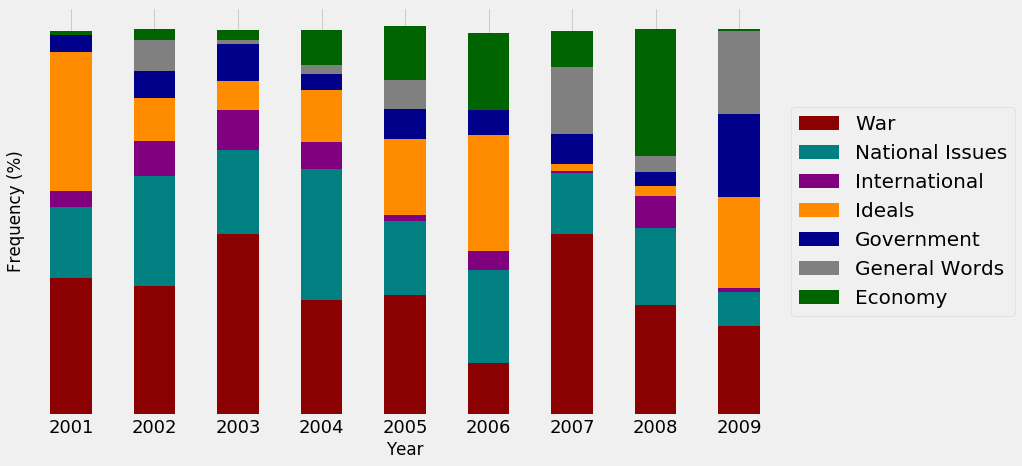

In [45]:
add_comp(transcripts, cat_df, pres, start_date, end_date)
# save plot image
# plt.savefig('model_output/ter_bush.png', bbox_inches='tight');

### Obama Addresses

In [46]:
pres = 'Barack Obama'

In [47]:
sort_top(transcripts, topic_df, 5, pres, start_date, end_date)

Topic 1                            Topic 2  \
                              Topic        %                     Topic   
Date                                                                     
2008       National Issues - People       36           Ideals - Values   
2009       National Issues - People       30           Ideals - Values   
2010  General Words - General Words  31.4444  National Issues - People   
2011       National Issues - People  23.5714              War - Terror   

                                     Topic 3                      Topic 4  \
            %                          Topic        %               Topic   
Date                                                                        
2008       24  General Words - General Words     17.5        War - Terror   
2009  14.4444  General Words - General Words  10.8889        War - Terror   
2010  20.7778                   War - Terror  13.8889  Economy - Policy 1   
2011  17.8571  General Words - General Words  14.7143     Ideals - Values   

                              Topic 5           
            %                   Topic        %  
Date                                            
2008      9.5       Ideals - Exemplar      6.5  
2009  10.6667  International - Global  7.66667  
2010  9.55556  Government - Officials  6.11111  
2011  13.2857  International - Global  9.28571

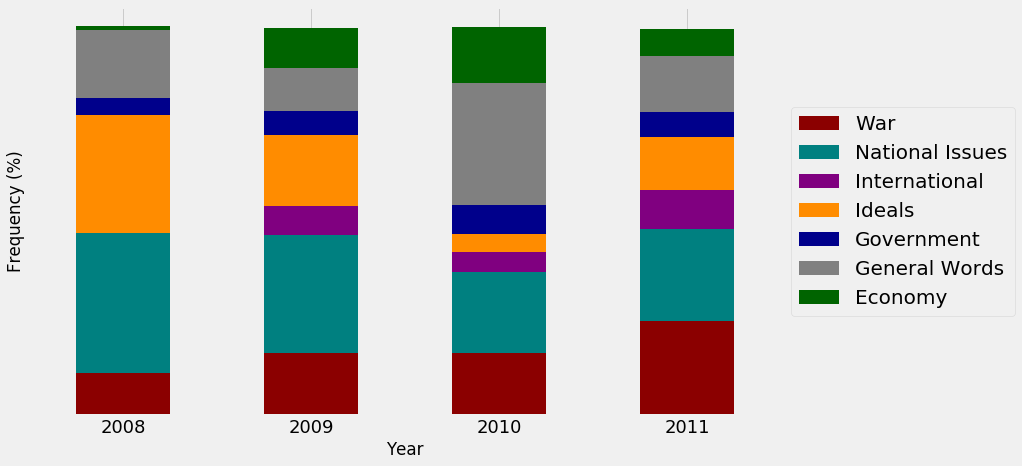

In [48]:
add_comp(transcripts, cat_df, pres, start_date, end_date)
# save plot image
# plt.savefig('model_output/ter_obam.png', bbox_inches='tight');

# WordCloud

In [49]:
from wordcloud import WordCloud
from PIL import Image

In [50]:
def wc_creator(vectorizer, model, topic_id, num_words, wc_img, color_fun):
    # array of all vectorized words
    words = vectorizer.get_feature_names()
    # upper case
    words = [x.upper() for x in words]
    # array of topic components per word
    comps = model.components_[topic_id]
    # sort (descending) words based on topic
    s_words = [words[i] for i in comps.argsort()[:-num_words - 1 :-1]]
    # sort (descending) components
    s_comps = [comps[i] for i in comps.argsort()[:-num_words - 1 :-1]]
    # convert sorted component float array to integer array
    s_comps = np.rint(s_comps/min(s_comps)).astype(int)
    # create array of words within topic
    topic_array = sum([[s] * n for s, n in zip(s_words, s_comps)], [])
    # convert array into string
    topic_string = ' '.join(topic_array)

    # read in image file
    mask = np.array(Image.open(wc_img))
    # create WordCloud object
    wc = WordCloud(
        width=800,
        height=400,
        mask=mask, 
        collocations=False,
        background_color='white',
        color_func=color_fun
    ).generate(topic_string)
    # plot WordCloud image
    plt.figure(figsize=(20,10), facecolor='white')
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off');

In [51]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 113.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(40, 100)) / 255.0)
    
    return "hsl({}, {}%, {}%)".format(h, s, l)

In [52]:
def blue_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 237
    s = 96
    l = int(100.0 * float(random_state.randint(40, 100)) / 255.0)
    
    return "hsl({}, {}%, {}%)".format(h, s, l)

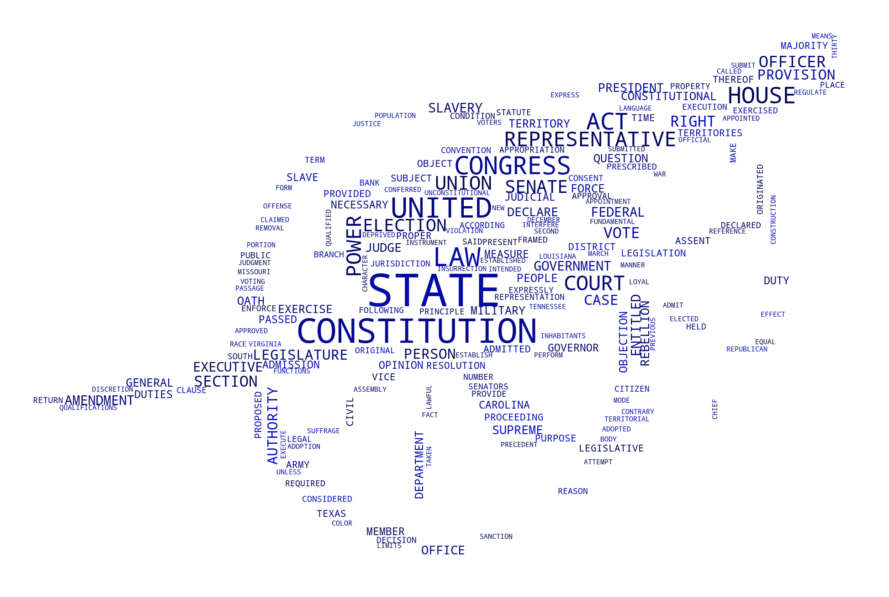

In [53]:
# Government - Organization
wc_creator(tf_vectorizer, nmf, 17, 500, 'img/cannon.jpg', blue_color_func)
# save plot image
# plt.savefig('model_output/law_cloud.png', bbox_inches='tight', transparent=True)

In [54]:
def green_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 69
    s = 44
    l = int(100.0 * float(random_state.randint(40, 100)) / 255.0)
    
    return "hsl({}, {}%, {}%)".format(h, s, l)

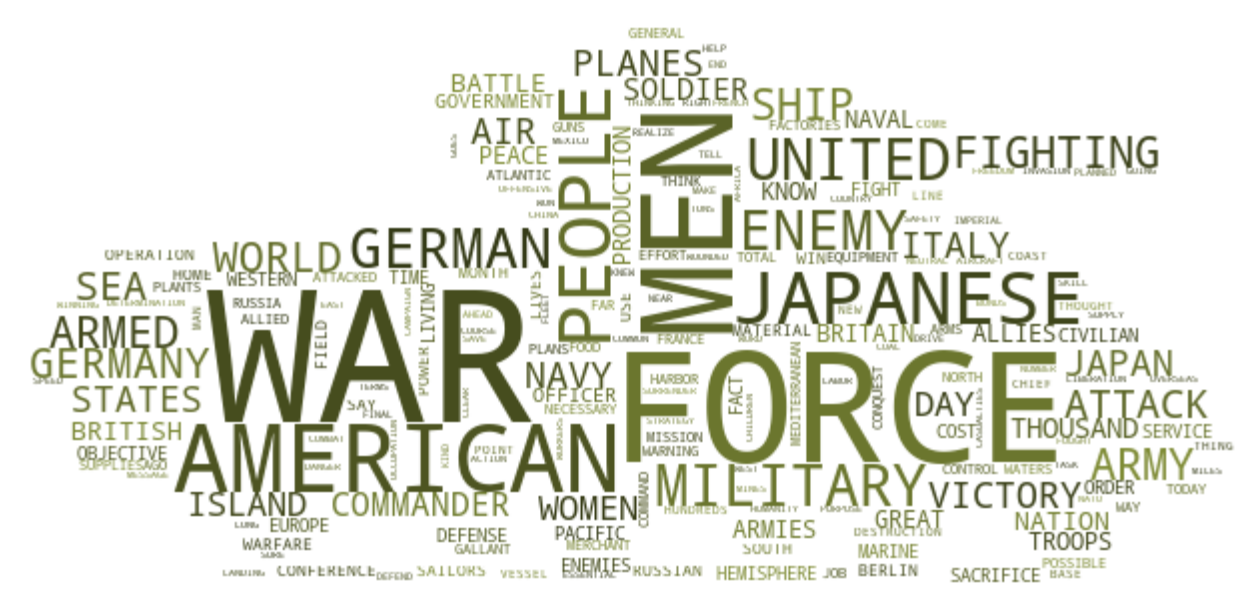

In [55]:
# War - WW2
# wc_creator(tf_vectorizer, nmf, 14, 500, 'img/helmet.jpg', 'Greens')
wc_creator(tf_vectorizer, nmf, 14, 500, 'img/m4.png', green_color_func)
# save plot image
# plt.savefig('model_output/ww2_cloud.png', bbox_inches='tight', transparent=True)

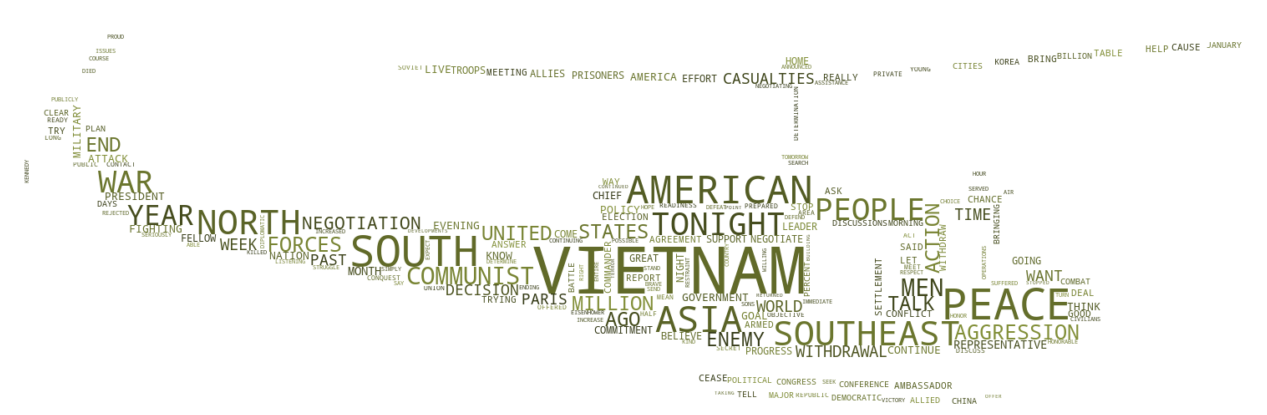

In [56]:
# War - Vietnam
# wc_creator(tf_vectorizer, nmf, 8, 500, 'img/huey.jpg', 'Greens_r')
wc_creator(tf_vectorizer, nmf, 8, 500, 'img/huey.jpg', green_color_func)
# save plot image
# plt.savefig('model_output/viet_cloud.png', bbox_inches='tight', transparent=True)

In [57]:
def khaki_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 54
    s = 77
    l = int(100.0 * float(random_state.randint(50, 100)) / 255.0)
    
    return "hsl({}, {}%, {}%)".format(h, s, l)

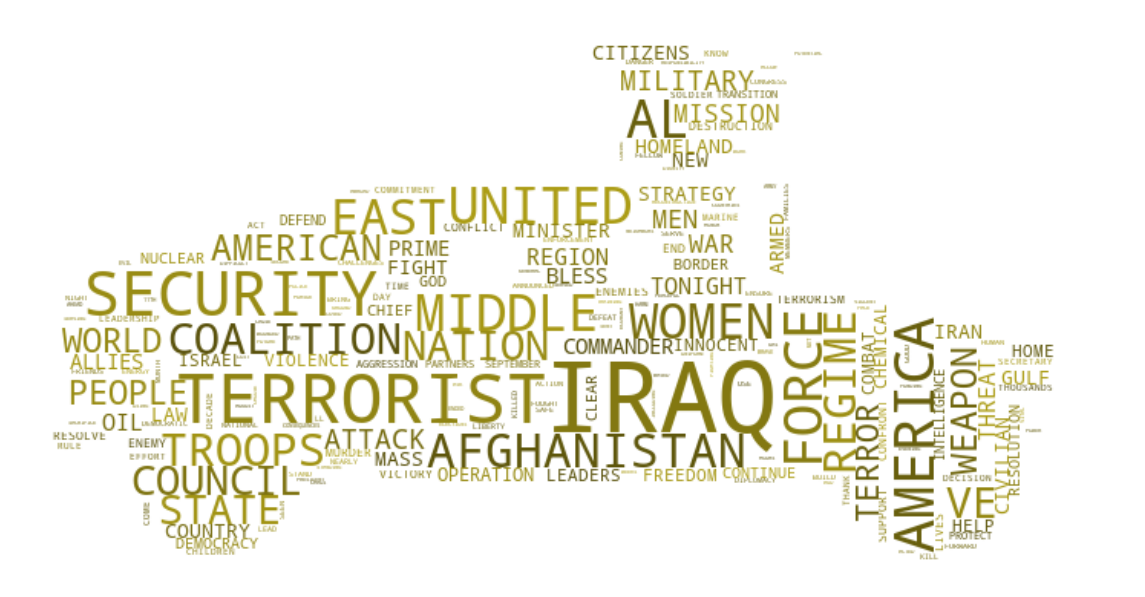

In [58]:
# War - Terror
wc_creator(tf_vectorizer, nmf, 9, 500, 'img/hummer.png', khaki_color_func)
# save plot image
# plt.savefig('model_output/ter_cloud.png', bbox_inches='tight', transparent=True)